# Logging Metrics

In [13]:
import mlflow
import matplotlib.pyplot as plt
mlflow.login()

2024/05/26 09:38:54 INFO mlflow.utils.credentials: Successfully connected to MLflow hosted tracking server! Host: https://adb-3088650010345545.5.azuredatabricks.net.


In [3]:
experiment_name = "/Shared/Experiments/logging_function"
tags = {"project_name":"UNDEFINED", "topic":"run_management", "mlflow.note.content":"This experiment is used to test the logging function."}
try:
    experiment_id = mlflow.create_experiment(name = experiment_name, tags = tags)
except:
    print("Experiment already exists.")    
experiment = mlflow.set_experiment(experiment_name)

Experiment already exists.


In [4]:
with mlflow.start_run(run_name="logging_metrics", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a single metric
    mlflow.log_metric("m1", 2.0, step=0)

    # logging multiple metrics
    mlflow.log_metrics({"m2": 3.0, "m3": 4.0})

Run ID: baf2a07fbba04625af777e903adf01dd


In [5]:
# Training a deep learning model 
epochs = 100
batch_size = 32
import random
with mlflow.start_run(run_name="logging_metrics", run_id=run.info.run_id, experiment_id=experiment.experiment_id) as run:
    for epoch in range(1,epochs+1):
        acc = 1 - 2 ** -epoch - random.random() / epoch
        loss = 2 ** -epoch + random.random() / epoch
        mlflow.log_metric("accuracy", acc, step=epoch)
        mlflow.log_metric("loss",loss, step = epoch)

In [6]:
client = mlflow.MlflowClient()

In [9]:
# use the client to get the metric history
metric_history = client.get_metric_history(run.info.run_id, "accuracy")

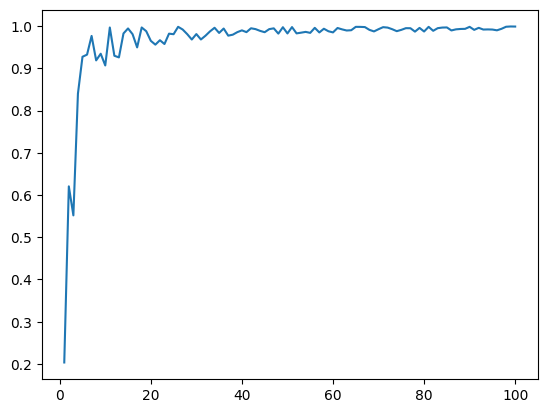

In [14]:
metric_value = [m.value for m in metric_history]
plt.plot(range(1,epochs+1), metric_value)

# Logging Parameters

In [15]:
with mlflow.start_run(run_name="logging_params", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a single parameter
    mlflow.log_param("p1", 2.0)

    # logging multiple parameters
    mlflow.log_params({"p2": 3.0, "p3": 4.0})

Run ID: b8350b8544b843d2b919512809817ebd


# Logging Dict

In [17]:
with mlflow.start_run(run_name="logging_dict", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a dictionary as json
    mlflow.log_dict(dictionary={"m1": 2.0, "m2": 3.0, "m3": 4.0}, artifact_file="files/metrics.json")

    # logging a dictionary as yaml 
    config = {
        "dev":{
            "epochs": 100,
            "batch_size": 32
        },
        "test":{
            "epochs": 50,
            "batch_size": 16
        },
        "prod":{
            "epochs": 10,
            "batch_size": 8
        }
    }
    mlflow.log_dict(dictionary=config, artifact_file="files/config.yaml")


Run ID: 2c1d31f0b0ea4a958062e16723b294c0


# Logging Artifacts

In [ ]:
#Log a single artifact (file)
with mlflow.start_run(run_name="logging_artifact", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging an artifact
    mlflow.log_artifact(local_path="../../images/mlflow_run.jpeg",artifact_path="images")

In [ ]:
with mlflow.start_run(run_name="logging_artifacts", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging an artifact
    mlflow.log_artifacts(local_dir="../../images",artifact_path="images")

# Logging Figure

Log a figure as an artifact. The following figure objects are supported:

* matplotlib.figure.Figure

* plotly.graph_objects.Figure

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([0, 1], [2, 3])

with mlflow.start_run(run_name="logging_figure", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a figure
    mlflow.log_figure(fig, artifact_file="figure.png")


# Logging Image

Log an image as an artifact. The following image objects are supported:

* numpy.ndarray

* PIL.Image.Image

In [ ]:
import numpy as np

image = np.random.randint(0, 256, size=(100, 100, 3), dtype=np.uint8)

with mlflow.start_run(run_name="logging_image", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging an image
    mlflow.log_image(image, artifact_file="image.png")


# Logging Table

Log a table to MLflow Tracking as a JSON artifact. If the artifact_file already exists in the run, the data would be appended to the existing artifact_file.

* data – Dictionary or pandas.DataFrame to log.

* artifact_file – The run-relative artifact file path in posixpath format to which the table is saved (e.g. “dir/file.json”).

In [ ]:
import mlflow

table_dict = {
    "inputs": ["What is MLflow?", "What is Databricks?"],
    "outputs": ["MLflow is ...", "Databricks is ..."],
    "toxicity": [0.0, 0.0],
}
with mlflow.start_run(run_name="logging_table", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # Log the dictionary as a table
    mlflow.log_table(data=table_dict, artifact_file="results.json")

# Logging Text

Log text as an artifact.

In [ ]:
with mlflow.start_run(run_name="logging_text", experiment_id=experiment.experiment_id) as run:

    print("Run ID:", run.info.run_id)
    # Log text to a file under the run's root artifact directory
    mlflow.log_text("text1", "file1.txt")

    # Log text in a subdirectory of the run's root artifact directory
    mlflow.log_text("text2", "dir/file2.txt")

    # Log HTML text
    mlflow.log_text("<h1>header</h1>", "index.html")